# **CLAIMS CLASSIFICATION PROJECT**
**Milestone 5 - Regression Analysis**

I'm working towards building a machine learning model that can be used to determine whether a video contains a claim or whether it offers an opinion. With a successful prediction model, the client can reduce the backlog of user reports and prioritize them more efficiently.

I'm getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and hypothesis testing.

The client is interested in how different variables are associated with whether a user is verified or not. Earlier, I observed that if a user is verified, he is much more likely to post opinions. Now, the client asks me to explore how to predict verified status to help him understand how video characteristics relate to verified users. Therefore, I have to conduct a logistic regression using verified status as the outcome categorical variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.

A notebook was structured and prepared in this project milestone. It includes questions to help me prepare an executive summary from this project milestone.

In this activity, I will build a logistic regression model in Python.


*I divided this activity in three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a logistic regression model?

**Part 2:** Model Building and Evaluation

**Part 3:** Interpreting Model Results
* What key insights emerged from the model(s)?
* What business recommendations do I propose based on the models built?


### **Task 1. Imports and loading**
Import the data and packages that you've learned are needed for building regression models.

In [69]:
# Import packages for data manipulation
import pandas as pd
import numpy as np

# Import packages for data visualization
### YOUR CODE HERE ###
import matplotlib.pyplot as plt
import seaborn as sns

# Import packages for data preprocessing
### YOUR CODE HERE ###
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
### YOUR CODE HERE ###
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [70]:
# Load dataset into dataframe
data = pd.read_csv("video_dataset.csv")

### **Task 2a. Explore data with EDA**

Let's Analyze the data and check for and handle missing values and duplicates.

Inspect the first five rows of the dataframe.

In [73]:
# Display first few rows
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [74]:
# Get number of rows and columns
data.shape

(19382, 12)

In [75]:
# Get data types of columns
data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [76]:
# Get basic information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [77]:
# Generate basic descriptive stats
data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


Let's check for and handle missing values.

In [79]:
# Check for missing values
data.isna().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [80]:
# Drop rows with missing values
data = data.dropna()

In [81]:
# Display first few rows after handling missing values
data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [82]:
# Check for duplicates
print("In the dataset there are", data.duplicated().sum(), "duplicates.")

In the dataset there are 0 duplicates.


Next, I'll check for and handle outliers, because they affect the regression model.

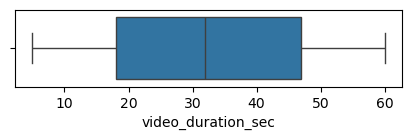

In [84]:
# Create a boxplot to visualize distribution of `video_duration_sec`
plt.figure(figsize=(5,1))
sns.boxplot(data['video_duration_sec'], orient='h');


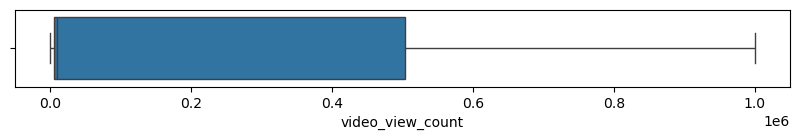

In [85]:
# Create a boxplot to visualize distribution of `video_view_count`
plt.figure(figsize=(10,1))
sns.boxplot(data['video_view_count'], orient='h');


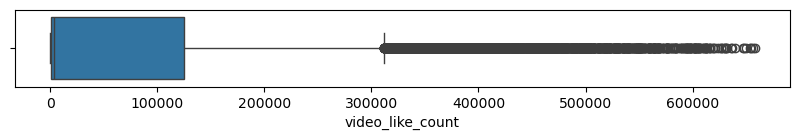

In [86]:
# Create a boxplot to visualize distribution of `video_like_count`
plt.figure(figsize=(10,1))
sns.boxplot(data['video_like_count'], orient='h');


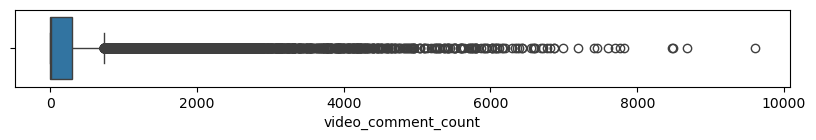

In [87]:
# Create a boxplot to visualize distribution of `video_comment_count`
plt.figure(figsize=(10,1))
sns.boxplot(data['video_comment_count'], orient='h');


In [88]:
# Check for and handle outliers for video_like_count
iqr = np.quantile(data['video_like_count'], 0.75) - np.quantile(data['video_like_count'], 0.25)
median_value = data['video_like_count'].median()
outlier_treshold = median_value + 1.5 * iqr

print('Number of outliers', 'video_like_count', "before handling:", (data['video_like_count'] > outlier_treshold).sum())
condition = data['video_like_count'] > outlier_treshold
data['video_like_count'] = np.where(condition, outlier_treshold, data['video_like_count'])
print('Number of outliers', 'video_like_count', "after handling:", (data['video_like_count'] > outlier_treshold).sum())

Number of outliers video_like_count before handling: 3468
Number of outliers video_like_count after handling: 0


In [89]:
# Check for and handle outliers for video_comment_count
iqr = np.quantile(data['video_comment_count'], 0.75) - np.quantile(data['video_comment_count'], 0.25)
median_value = data['video_comment_count'].median()
outlier_treshold = median_value + 1.5 * iqr

print('Number of outliers', 'video_comment_count', "before handling:", (data['video_comment_count'] > outlier_treshold).sum())
condition = data['video_comment_count'] > outlier_treshold
data['video_comment_count'] = np.where(condition, outlier_treshold, data['video_comment_count'])
print('Number of outliers', 'video_comment_count', "after handling:", (data['video_comment_count'] > outlier_treshold).sum())

Number of outliers video_comment_count before handling: 3882
Number of outliers video_comment_count after handling: 0


In [90]:
# Check class balance for verified_status
print(data['verified_status'].value_counts())
print()
print('In percentage:')
print(data['verified_status'].value_counts(normalize=True))

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

In percentage:
verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64


Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.3% represents videos posted by verified accounts. So the outcome variable is not very balanced. Therefore, I'll need to use resampling to create class balance in the outcome variable.

In [92]:
# Use resampling to create class balance in the outcome variable

# Identify data points from majority and minority classes
data_majority = data[data['verified_status']=='not verified']
data_minority = data[data['verified_status']=='verified']

# Upsample the minority class (which is "verified")
# Resample with replacement
data_minority_upsampled = resample(data_minority, replace=True, n_samples=len(data_majority), random_state=0)

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True) 

# Display new class counts
print(data_upsampled['verified_status'].value_counts())
print()
print('In percentage:')
print(data_upsampled['verified_status'].value_counts(normalize=True))


verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

In percentage:
verified_status
not verified    0.5
verified        0.5
Name: proportion, dtype: float64


In [93]:
# Get the average `video_transcription_text` length for videos posted by verified accounts and the average video_transcription_text length for videos posted by unverified accounts.
data_upsampled[['verified_status', 'video_transcription_text']].groupby(by='verified_status')[['video_transcription_text']].agg(func=lambda array: np.mean([len(text) for text in array]))


,video_transcription_text
verified_status,
not verified,89.401141
verified,84.569559


The length of each `video_transcription_text` can be used as a potential feature in the model.

In [95]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled['text_length'] = data_upsampled['video_transcription_text'].transform(func=lambda x: len(x))


In [96]:
# Display first few rows of dataframe after adding new column
data_upsampled.head()


,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,text_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.000,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.000,19034.0,1161.0,445.5,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.000,2858.0,833.0,329.0,137
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,189717.375,34812.0,1234.0,445.5,131
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.000,4110.0,547.0,152.0,128


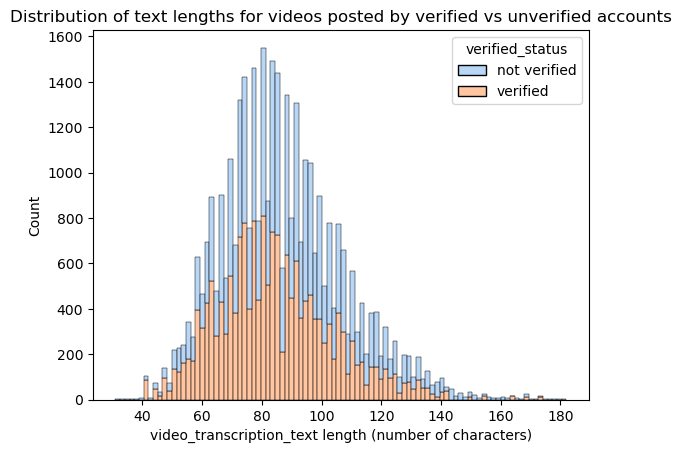

In [97]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data=data_upsampled, x='text_length', stat="count", hue='verified_status', multiple="stack", palette="pastel", element='bars', legend=True)

# Set the title and labels
plt.title('Distribution of text lengths for videos posted by verified vs unverified accounts')
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")

# Show the plot
plt.show()


### **Task 2b. Examine correlations**

In [99]:
# Code a correlation matrix to help determine most correlated variables
correlation_matrix = data_upsampled.corr(numeric_only=True)


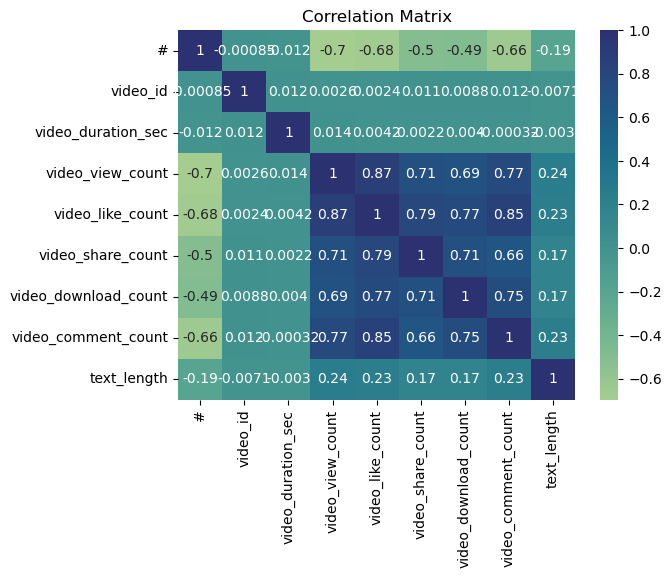

In [100]:
# Create a heatmap to visualize how correlated variables are
sns.heatmap(correlation_matrix, annot=True, cmap='crest')

# Set the title
plt.title('Correlation Matrix')

# Show the plot
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features.

The heatmap shows that all count variables are strong correlated with each other. But, the strongest correlation is between 'video_view_count' and 'video_like_count' (corr. coefficient of 0.86). Therefore, one of these variables should be excluded from the model. I've chosen to exclude 'video_like_count', because it is also highly correlated with the 'video_comment_count' variable (corr. coefficient of 0.85).

Taking this into consideration as I examine the heatmap, I choose the following features to proceed with 5 features: 'video_view_count', 'video_share_count', 'video_download_count', 'video_comment_count', 'author_ban_status', and of course the outcome categorical variable 'verified_status'.


After analysis and deriving variables with close relationships, it is time to begin constructing the model.

### **Task 3a. Select variables**

In [104]:
# Select outcome variable
y = data_upsampled['verified_status']

In [105]:
# Select features
features_list = ['video_duration_sec', 'claim_status', 'author_ban_status', 'video_view_count', 'video_share_count', 'video_download_count', 'video_comment_count']
X = data_upsampled[features_list]

# Display first few rows of features dataframe
X.head()


,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,445.5
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,445.5
4,19,claim,active,56167.0,4110.0,547.0,152.0


### **Task 3b. Train-test split**

First, I'll split the data into training and testing sets.

In [108]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


Next, I should confirm that the dimensions of the training and testing sets are in alignment:

In [110]:
# Get shape of each training and testing set
print('features train shape:', X_train.shape)
print('features test shape:', X_test.shape)
print('outcome train shape:', y_train.shape)
print('outcome test shape:', y_test.shape)

features train shape: (26826, 7)
features test shape: (8942, 7)
outcome train shape: (26826,)
outcome test shape: (8942,)


The training sets both have 26.826 rows, and the test sets both have 8942 rows. Features train and test sets both have 7 columns.
Therefore, the dimensions of the training and testing sets are in alignment.

### **Task 3c. Encode variables**

In [113]:
# Check data types
print('Features:')
print(X_train.dtypes)


Features:
video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object


In [114]:
# Get unique values in `claim_status`
X_train['claim_status'].unique()


array(['opinion', 'claim'], dtype=object)

In [115]:
# Get unique values in `author_ban_status`
X_train['author_ban_status'].unique()

array(['active', 'under review', 'banned'], dtype=object)

As shown above, the `claim_status` and `author_ban_status` features are each of data type `object` currently. In order to work with the implementations of models through `sklearn`, these categorical features will need to be made numeric. One way to do this is through one-hot encoding.

Encode categorical features in the training set using an appropriate method.

In [117]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[['claim_status', 'author_ban_status']]

# Display first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
28075,opinion,active
28358,opinion,active
27086,claim,active
7104,claim,active
25784,opinion,under review


In [118]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)


In [119]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [120]:
# Get feature names from encoder
X_encoder.get_feature_names_out()


array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [121]:
# Display first few rows of encoded training features
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [122]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()


,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,0.0,0.0,0.0
3,0.0,0.0,0.0
4,1.0,0.0,1.0


In [123]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(['claim_status', 'author_ban_status'], axis=1).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
28075,52,7612.0,105.0,1.0,0.0
28358,23,9303.0,593.0,49.0,13.0
27086,11,366577.0,40248.0,1486.0,445.5
7104,43,176311.0,22270.0,1546.0,445.5
25784,24,4320.0,194.0,23.0,0.0


In [124]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(['claim_status', 'author_ban_status'], axis=1).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,52,7612.0,105.0,1.0,0.0,1.0,0.0,0.0
1,23,9303.0,593.0,49.0,13.0,1.0,0.0,0.0
2,11,366577.0,40248.0,1486.0,445.5,0.0,0.0,0.0
3,43,176311.0,22270.0,1546.0,445.5,0.0,0.0,0.0
4,24,4320.0,194.0,23.0,0.0,1.0,0.0,1.0


In [125]:
# Check data type of outcome variable
y_train.dtype


dtype('O')

In [126]:
# Get unique values of outcome variable
y.unique()


array(['not verified', 'verified'], dtype=object)

A shown above, the outcome variable is of data type `object` currently. One-hot encoding can be used to make this variable numeric.

Therefore, I'll encode categorical values of the outcome variable the training set using an appropriate method.

In [128]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)


In [129]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array

y_train_2D = y_train.values.reshape(-1, 1)
print(y_train_2D)

# Fit and transform the data
y_train_encoded = y_encoder.fit_transform(y_train_2D)

#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = np.ravel(y_train_encoded)

# Display the encoded training outcome variable
y_train_final


[['verified']
 ['verified']
 ['verified']
 ...
 ['not verified']
 ['not verified']
 ['not verified']]


array([1., 1., 1., ..., 0., 0., 0.])

### **Task 3d. Model building**

Construct a model and fit it to the training set.

In [132]:
# Construct a logistic regression model and fit it to the training set
# Create a Logistic Regression model
model = LogisticRegression(max_iter=1000)

# Fit the model to the training data
model.fit(X_train_final, y_train_final)


LogisticRegression(max_iter=1000)

### **Taks 4a. Results and evaluation**

Evaluate your model.

Encode categorical features in the testing set using an appropriate method.

In [135]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[['claim_status', 'author_ban_status']]

# Display first few rows
X_test_to_encode.head()


,claim_status,author_ban_status
26849,opinion,active
1227,claim,under review
25467,opinion,active
27310,opinion,active
27560,opinion,active


In [136]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.fit_transform(X_test_to_encode)

# Display first few rows of encoded testing features
X_test_encoded


array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [137]:
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_test_encoded_df.head()


,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,0.0,0.0,1.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [138]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)

X_test.drop(columns=['claim_status', 'author_ban_status']).head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
26849,12,2177.0,168.0,6.0,2.0
1227,43,862507.0,86137.0,3206.0,265.0
25467,13,7457.0,100.0,7.0,2.0
27310,6,6388.0,133.0,9.0,1.0
27560,34,4075.0,325.0,16.0,4.0


In [139]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(['claim_status', 'author_ban_status'], axis=1).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,12,2177.0,168.0,6.0,2.0,1.0,0.0,0.0
1,43,862507.0,86137.0,3206.0,265.0,0.0,0.0,1.0
2,13,7457.0,100.0,7.0,2.0,1.0,0.0,0.0
3,6,6388.0,133.0,9.0,1.0,1.0,0.0,0.0
4,34,4075.0,325.0,16.0,4.0,1.0,0.0,0.0


Now, let's test the logistic regression model. Use the model to make predictions on the encoded testing set.

In [141]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = model.predict(X_test_final)


In [142]:
# Display the predictions on the encoded testing set
y_pred


array([1., 0., 1., ..., 1., 1., 1.])

In [143]:
# Display the true labels of the testing set
y_test


26849        verified
1227     not verified
25467        verified
27310        verified
27560        verified
             ...     
16315    not verified
19045        verified
30024        verified
17501    not verified
29483        verified
Name: verified_status, Length: 8942, dtype: object

In order to compare the testing set with the predictions, I should encode its true labels.

In [145]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions

y_test_final = y_encoder.fit_transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 0., 1., ..., 1., 0., 1.])

I should confirm again that the dimensions of the training and testing sets are in alignment since additional features were added.

In [147]:
# Get shape of each training and testing set
print(X_train_final.shape)
print(y_train_final.shape)
print(X_test_final.shape)
print(y_test_final.shape)


(26826, 8)
(26826,)
(8942, 8)
(8942,)


### **Task 4b. Visualize model results**

In order to visualize the logistic regression model's results, I'll create a confusion matrix.

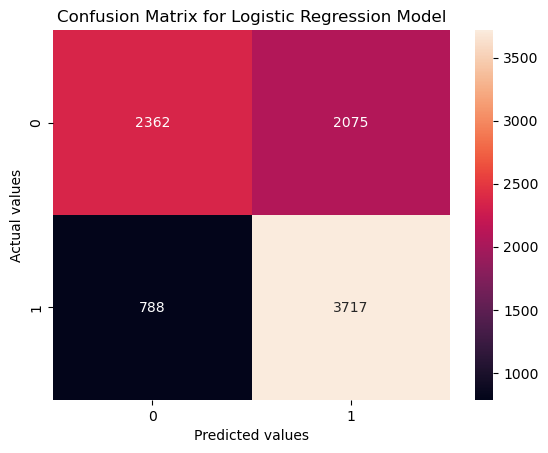

In [207]:
# Compute values for confusion matrix
true_negatives = X_test
cm = confusion_matrix(y_test_final, y_pred, labels=model.classes_)

# Create display of confusion matrix

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d')
plt.title('Confusion Matrix for Logistic Regression Model')
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

# Display plot
plt.show()

In [2717]:
(3717+2362) / (3717+788+2075+2362)

0.6798255423842541

The percentage of correctly classified videos is almost 68%, which is far better than a classification by chance with 50% probability of correct classification. 

The upper-left quadrant displays true negatives: the number of posted unverified videos that the model acurately classified as unverified.
The down-right quadrant displays true positives: the number of posted verified videos that the model acurately classified as verified.
The lower-left quadrant displays false negatives: the number of posted verified videos that the model misclassified as unverified.
The upper-right quadrant displays false positives: the number of posted unverified videos that the model misclassified as verified.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

Let's create a classification report that includes precision, recall, f1-score, and accuracy metrics to evaluate the performance of the logistic regression model.

In [2719]:
# Create a classification report
target_labels = ["not verified", "verified"]
report = classification_report(y_test_final, y_pred, target_names=target_labels)
#report = classification_report(y_test_final, y_pred)
print(report)

              precision    recall  f1-score   support

not verified       0.75      0.53      0.62      4437
    verified       0.64      0.83      0.72      4505

    accuracy                           0.68      8942
   macro avg       0.70      0.68      0.67      8942
weighted avg       0.70      0.68      0.67      8942



The classification report above shows that the logistic regression model achieved a precision of 75% and a recall of 53%, and it achieved an accuracy of 68%. Note that the precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

### **Task 4c. Interpret model coefficients**

In [2721]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability

feature_names = X_test_final.columns
coefficients = model.coef_

data = {}
for feature, coefficient in zip(feature_names, coefficients[0]):
    data[feature] = [coefficient]

#print(data)
features = pd.DataFrame(data)
features.head(8)


,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,-0.002279,-2.820766e-07,0.000006,-0.000094,0.000913,1.7127,-0.462248,-0.04126


### **Task 4d. Conclusion**


The key takeaways from this project milestone are:

- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. Therefore, I decided to drop `video_like_count` variable from the model building.
- The logistic regression model had acceptable predictive power: the overall f1-score is 67%, which is towards the lower end of what would typically be considered acceptable. 

The following results from this project milestone can be presented to the client:
I developed a logistic regression model for verified status based on video features. The model had decent predictive power. Based on the estimated model coefficients from the logistic regression, videos with more shares and comments tend to be associated with higher odds of the user being verified. Longer videos tend to be associated with smaller odds of the user being verified.
Other video features have small estimated coefficients in the model, so their association with verified status seems to be small.